##Section 1

**Components and Libraries of Spark**
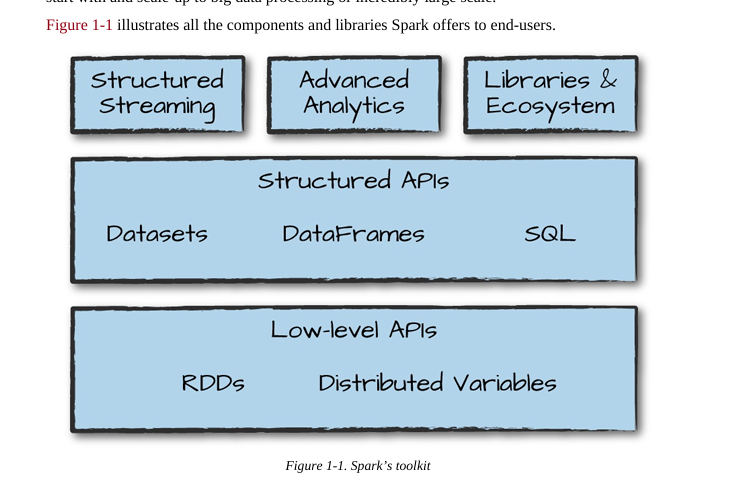

 **Architecture of Spark Application**
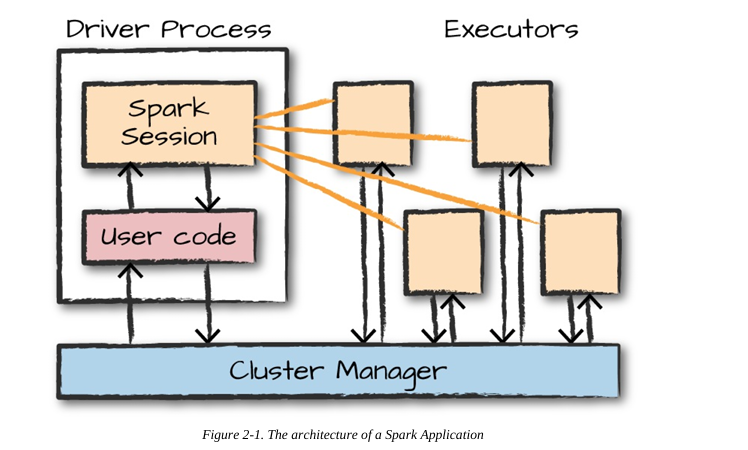


Apache Spark began at UC Berkeley in 2009 as the Spark research project, which was first
 published the following year in a paper entitled “Spark: Cluster Computing with Working Sets”
 by Matei Zaharia, Mosharaf Chowdhury, Michael Franklin, Scott Shenker, and Ion Stoica of the
 UC Berkeley AMPlab. **At the time, Hadoop MapReduce was the dominant parallel programming
 engine for clusters**, being the first open source system to tackle data-parallel processing on
 clusters of thousands of nodes.

**From Spark 2.0 SparkSession provides a single Entry point to interact with Spark functionaltiy**

**Relationship between SparkSession  & Spark Language APIs**
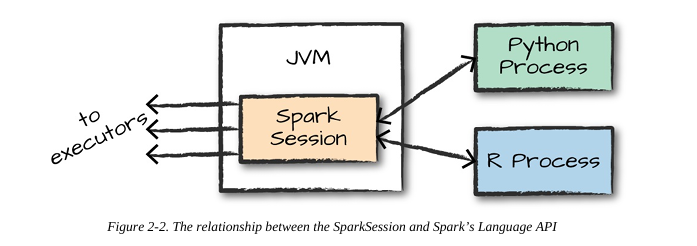

**Breaking Dataframes into multiple chuks for Parallel data processing**
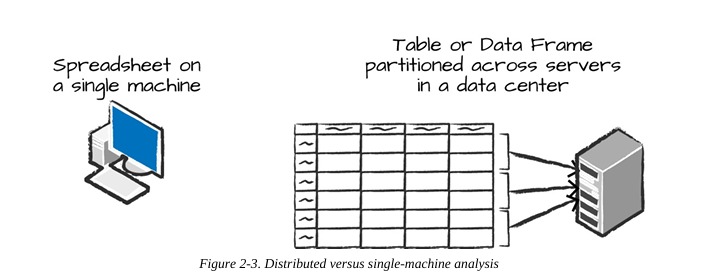

 **Partitions**
 To allow every executor to perform work in parallel, Spark breaks up the data into chunks called
 partitions. A partition is a collection of rows that sit on one physical machine in your cluster

If we have 1 partition, Spark will have a parallelism of 1 even of we have 1000 executors
On the other hand, if we have many partitions but only 1 executors then also spark will have parallelism of 1

We need to calculate between no of partitions to create based on no. of executors available in cluster

**In Spark, the core data structures are immutable, meaning they cannot be changed after they’re  created**

**Transformation & Action**

Transformations allow us to build up our logical transformation plan

**Narrow transformation** --> type of operation where data from one partition is processed and results in only one partition.This means that no data movement between partitions is required during the transformation. In the case of a narrow transformation, the operation works only within a single partition. It doesn't require any data from other partitions. So, once the transformation is applied, the output is also stored in the same partition.
Examples:
* map()
* filter()
* flatMap()
* mapPartitions()
* mapValues()
* union()
* sample()
* sortBy()
* groupBy()
* distinct()
* coalesce()
* zip()


In [ ]:
#Example of Narrow Transformation
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("NarrowTransformationExample").getOrCreate()

# Create an RDD from a list of numbers
numbers = spark.sparkContext.parallelize([1, 2, 3, 4, 5])

# Apply the map transformation to double each number
doubled_numbers = numbers.map(lambda x: x * 2)

# Collect the results and print them
print(doubled_numbers.collect())


[2, 4, 6, 8, 10]


**Wide Transformation** --> A wide transformation in Spark refers to an operation where data from multiple partitions needs to be rearranged or shuffled to complete the transformation. This means that the transformation involves redistributing data across partitions, typically to group data, join datasets,
Examples :
* groupBy()
* Join()
* leftOuterJoin(), rightOuterJoin(), fullOuterJoin()
* distinct
* reduceByKey
* cogroup
* repartition
* coalesce
* groupByKey()
* aggregateByKey()
* sortByKey()
* union()
* subtract()







**Action** : To trigger the computation,
 we run an action. An action instructs Spark to compute a result from a series of transformations
 Examples:
 collect()
 count()
 first()
 take(n)
 reduce()
 saveAsTextFile()

 **Spark UI**
 The Spark UI displays information on the state of your Spark jobs, its environment, and cluster
 state. It’s very useful, especially for tuning and debugging

In [ ]:
#An End-to-End Example

In [ ]:
storage_account = "rqstgacct"
container = "inputsource"
file_path = "2015-summary.csv"
access_key = "h3eQACUU/LPjCmFcxlCDjW6+SJ0VuA6xHSAQpH3B+JJtVfQeV7si9sSu5SclIvppU/2NktZpDPna+AStvpzm/g=="

spark.conf.set(
    f"fs.azure.account.key.{storage_account}.blob.core.windows.net",
    access_key
)


flightData2015  = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .csv(f"wasbs://{container}@{storage_account}.blob.core.windows.net/{file_path}")
flightData2015 .show()

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
|    United States|          Singapore|    1|
|    United States|            Grenada|   62|
|       Costa Rica|      United States|  588|
|          Senegal|      United States|   40|
|          Moldova|      United States|    1|
+-----------------+-------------------+-----+
only showing top 10 rows


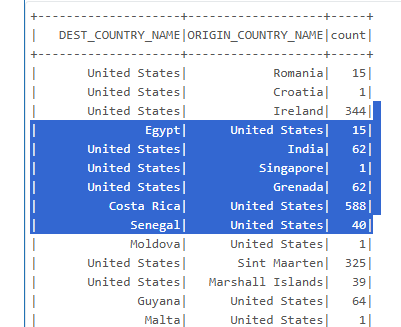

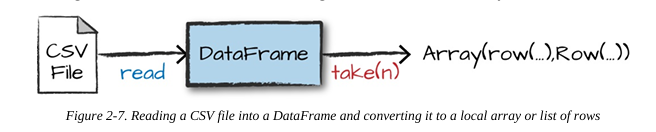

In [ ]:

#Action
flightData2015.take(3)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344)]

In [ ]:
flightData2015.sort("count").explain()

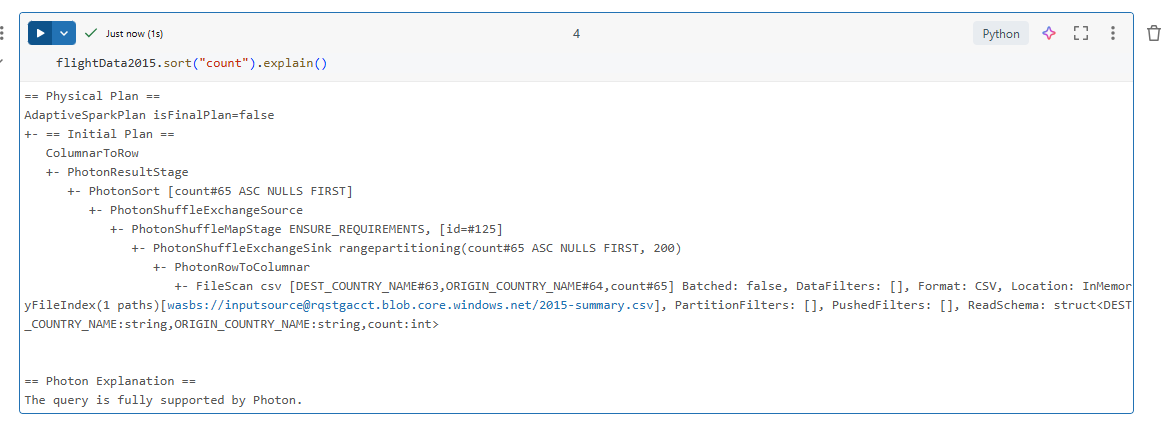

You can read explain plans from top to bottom, the
 top being the end result, and the bottom being the source(s) of data.

In [ ]:
 spark.conf.set("spark.sql.shuffle.partitions", "5")

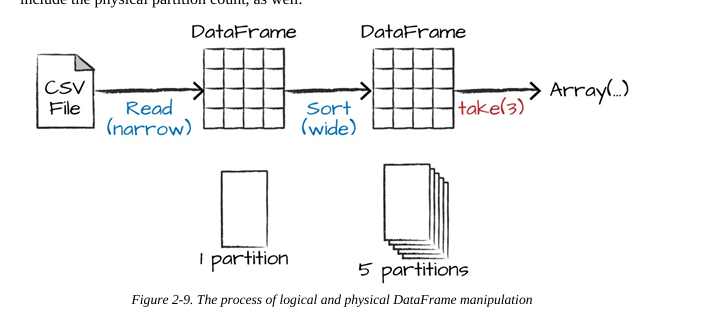

**DataFrames and SQL**

With Spark SQL, you can register any DataFrame as a table or
 view (a temporary table) and query it using pure SQL. There is no performance difference
 between writing SQL queries or writing DataFrame code, they both “compile” to the same
 underlying plan that we specify in DataFrame code.

<h1>Chapter-3</h1>

**Datasets: Type-Safe Structured APIs**

Creating Singleton object. From Singleton creating your collection
Example: creating singleton  

case class Flight(DEST_COUNTRY_NAME: String,
 ORIGIN_COUNTRY_NAME: String,
 count: BigInt)

 Now, create your collection of these singletons
  val flightsDF = spark.read
.parquet("/data/flight-data/parquet/2010-summary.parquet/")
 val flights = flightsDF.as[Flight]

**Structured Streaming**

Incrementally processing the data

Refer notebook : TDG-Section1-chap3.ipynb


Spark Streaming Vs Structured Streaming

**Lower-Level APIs**

Virtually everything in Spark is built on
 top of RDDs(Resilient Distributed Datasets )
 DataFrame operations are built on top of RDDs  and compile down to these lower-level tools for convenient and extremely efficient distributed execution

  

 **Note** :  There are basically no instances in modern Spark, for which you
 should be using RDDs instead of the structured APIs beyond manipulating some very raw
 unprocessed and unstructured data.

##Section 2

**Structured APIs**

Three core types of distributed collection APIs


*   Datasets
*   Dataframes
*   SQL Tables & Views




*   The typed and  untyped APIs (and their differences)
*   User specifies transformations. Multiple transformations build up a directed acyclic graph(DAG) of instructions. An action begins the process of
 executing that graph of instructions, as a single job, by breaking it down into stages and tasks to execute across the cluster





Spark has two notions of structured collections: DataFrames and Datasets
DataFrames and Datasets represent immutable, lazily evaluated plans that specify what operations to apply to data residing at a  location to generate some output. When we perform an action on a DataFrame, we instruct Spark
 to perform the actual transformations and return the result. These represent plans of how to manipulate rows and columns to compute the user’s desired result.
  Tables and views are basically the same thing as DataFrames. We just execute SQL against them
 instead of DataFrame code.

**Schemas**
 A schema defines the column names and types of a DataFrame.

Spark is effectively a programming language of its own. Internally, Spark uses an engine called ***Catalyst*** that maintains its own type information through the planning and processing of work

 **DataFrames Versus Datasets**

“untyped” DataFrames and
 the “typed” Datasets. DataFrames are untyped is aslightly inaccurate; they have
 types, but Spark maintains them completely and only checks whether those types line up to those specified in the schema at runtime.

 Datasets, on the other hand, check whether types conform to the specification at compile time.

 Datasets are only available to Java Virtual Machine (JVM) based languages (Scala and Java) and we specify types with case classes or Java beans

DataFrames are simply Datasets of Type Row
The “Row” type is Spark’s internal representation of its optimized in-memory format for computation

Note : "Row" format made for highly specialized and efficient computation because rather than using JVM types, which can cause high garbage-collection and
 object instantiation costs, Spark can operate on its own internal format without incurring any of those costs.
 When you’re using DataFrames, you’re taking advantage of Spark’s  optimized internal format.

**Columns**

 Columns represent a simple type like an integer or string, a complex type like an array

**Rows**

 A row is nothing more than a record of data. Each record in a DataFrame must be of type Row

**Structured API Execution**

How spark code is executed across a cluster
1.  Write DataFrame/Dataset/SQL Code.
2.  If valid code, Spark converts this to a Logical Plan.
3. Spark transforms this Logical Plan to a Physical Plan, checking for optimizations along the way.
4. Spark then executes this Physical Plan (RDD manipulations) on the cluster

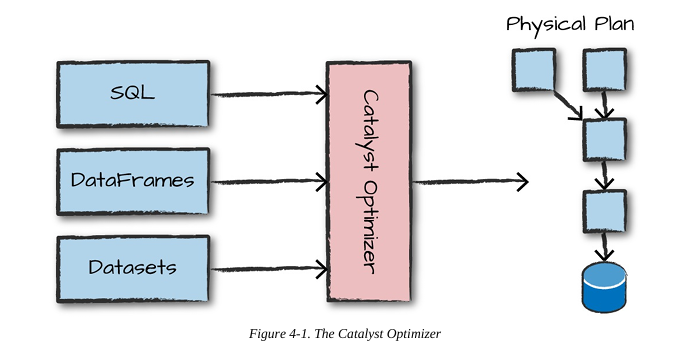

 **Logical Planning**

The first phase of execution is meant to take user code and convert it into a logical plan.
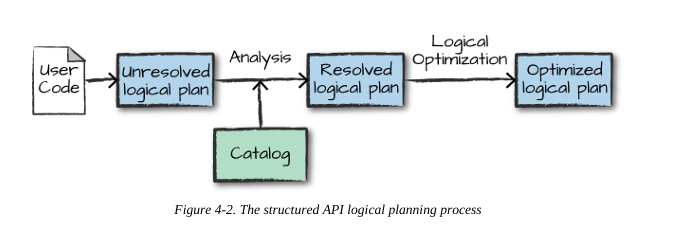

it’s purely to convert the user’s set of expressions into the most optimized version. It does this by converting user code into an unresolved logical plan. This plan is unresolved because although the code might be valid, the tables or columns that it refers to might or might not exist. Spark uses the catalog, a repository of all table and DataFrame information, to resolve columns and tables in the analyzer. The analyzer might reject the unresolved logical plan if the required table or column name does not exist in the catalog.
If the analyzer can resolve it, the result is passed through the **Catalyst Optimizer**, a collection of rules that attempt to optimize the
 logical plan by pushing down predicates or selections.

 **Physical Planning**

After successfully creating an optimized logical plan, Spark then begins the physical planning process. The physical plan, often called a Spark plan, specifies how the logical plan will execute on the cluster by generating different physical execution strategies and comparing them through a cost model

 Physical plan results in a series of RDDs and transformations.



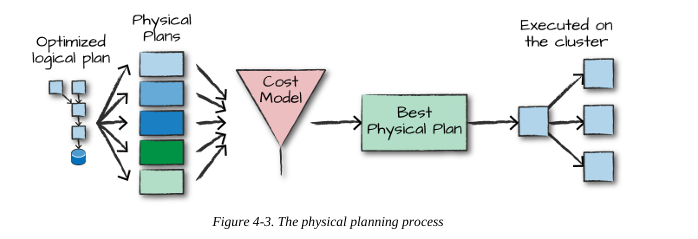

**Partioning**

Partitioning of the DataFrame defines the layout of the DataFrame or Dataset’s physical distribution across the cluster.

**Schemas**

 A schema defines the column names and types of a DataFrame. We can either let a data source  define the schema (called schema-on-read) or we can define it explicitly ourselves

Refer --> TDG-Section2-chap5.ipynb

**Columns and Expressions**

Columns in Spark are similar to columns in a spreadsheet, R dataframe, or pandas DataFrame.
 We can select, manipulate, and remove columns from DataFrames and these operations are represented as expressions.

 **Records and Rows**

  In Spark, each row in a DataFrame is a single record. Spark represents this record as an object of type Row.

**DataFrame Transformations**

 *   We can add rows or columns
 *   We can remove rows or columns
 *   We can transform a row into a column (or vice versa)
 *   We can change the order of rows based on the values in column

**select and selectExpr**


 select and selectExpr allow you to do the DataFrame equivalent of SQL queries on a table of data


**Case Sensitivity**

 By default Spark is case insensitive

 you can make Spark case sensitive by setting the configuration:


 -- in SQL


 set spark.sql.caseSensitive true

**Repartition and Coalesce**

Important optimization opportunity is to partition the data according to some frequently filtered columns, which control the physical layout of data across the cluster including the partitioning scheme and the number of partitions.
 Repartition will incur a full shuffle of the data, regardless of whether one is necessary. This means that you should typically only repartition when the future number of partitions is greater than your current number of partitions or when you are looking to partition by a set of columns


 Coalesce, on the other hand, will not incur a full shuffle and will try to combine partitions.